In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.ticker import FuncFormatter
matplotlib.style.use('ggplot')
import sqlite3 
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

mta = pd.read_csv(r"C:\Users\will0\Downloads\Turnstile_Usage_Data__2020 (1).csv", sep = ',',header = None,)
mta.columns =['C/A','unit','SCP','Station','line name','division','date','time','desc','entries','exits'] 
mta = mta.drop(0)

In [23]:
mta.head()

,C/A,unit,SCP,Station,line name,division,date,time,desc,entries,exits
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,03:00:00,REGULAR,"7,511,448","2,558,786"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,"7,511,451","2,558,789"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,"7,511,461","2,558,813"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,"7,511,495","2,558,831"
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,"7,511,620","2,558,857"


In [24]:
mta['datetime'] = pd.to_datetime(mta.date + ' ' + mta.time, format='%m/%d/%Y  %H:%M:%S')
mta['turnstile'] = mta['C/A'] + '-' + mta['unit'] + '-' + mta['SCP']



In [25]:
mta['entries'] = mta['entries'].astype('str')
mta['entries'].info

<bound method Series.info of 1           7,511,448
2           7,511,451
3           7,511,461
4           7,511,495
5           7,511,620
              ...    
13317996        5,554
13317997        5,554
13317998        5,554
13317999        5,554
13318000        5,554
Name: entries, Length: 13318000, dtype: object>

In [26]:
mta.head()

,C/A,unit,SCP,Station,line name,division,date,time,desc,entries,exits,datetime,turnstile
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,03:00:00,REGULAR,"7,511,448","2,558,786",2021-01-01 03:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,"7,511,451","2,558,789",2021-01-01 07:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,"7,511,461","2,558,813",2021-01-01 11:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,"7,511,495","2,558,831",2021-01-01 15:00:00,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,"7,511,620","2,558,857",2021-01-01 19:00:00,A002-R051-02-00-00


In [27]:
mta['entries'] = mta['entries'].str.replace(',','')

In [28]:
mta.head()

,C/A,unit,SCP,Station,line name,division,date,time,desc,entries,exits,datetime,turnstile
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,03:00:00,REGULAR,7511448,"2,558,786",2021-01-01 03:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,7511451,"2,558,789",2021-01-01 07:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,7511461,"2,558,813",2021-01-01 11:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,7511495,"2,558,831",2021-01-01 15:00:00,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,7511620,"2,558,857",2021-01-01 19:00:00,A002-R051-02-00-00


In [29]:
mta['exits'] = mta['exits'].astype('str')
mta['exits'] = mta['exits'].str.replace(',','')

In [30]:
mta['entries'] = mta['entries'].astype('int')
mta['exits'] = mta['exits'].astype('int')

In [31]:
mta.head()

,C/A,unit,SCP,Station,line name,division,date,time,desc,entries,exits,datetime,turnstile
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,03:00:00,REGULAR,7511448,2558786,2021-01-01 03:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,7511451,2558789,2021-01-01 07:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,7511461,2558813,2021-01-01 11:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,7511495,2558831,2021-01-01 15:00:00,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,7511620,2558857,2021-01-01 19:00:00,A002-R051-02-00-00


In [32]:
mta_sorted = mta.sort_values(['turnstile', 'datetime'])
mta_sorted = mta_sorted.reset_index(drop = True)

turnstile_grouped = mta_sorted.groupby(['turnstile'])

mta_sorted['entries_diff'] = turnstile_grouped['entries'].transform(pd.Series.diff)
mta_sorted['exits_diff'] = turnstile_grouped['exits'].transform(pd.Series.diff)

mta_sorted.head()

,C/A,unit,SCP,Station,line name,division,date,time,desc,entries,exits,datetime,turnstile,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,10.0,11.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00,66.0,71.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647,2019-12-28 15:00:00,A002-R051-02-00-00,216.0,53.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713,2019-12-28 19:00:00,A002-R051-02-00-00,376.0,66.0


In [33]:
print('Descriptions of entries_diff:')
print(mta_sorted['entries_diff'].describe())
print('')
print('Descriptions of exits_diff:')
print(mta_sorted['exits_diff'].describe())

Descriptions of entries_diff:
count    1.331291e+07
mean     3.508522e+02
std      2.523403e+06
min     -1.895328e+09
25%      0.000000e+00
50%      6.000000e+00
75%      4.400000e+01
max      2.038596e+09
Name: entries_diff, dtype: float64

Descriptions of exits_diff:
count    1.331291e+07
mean     2.602210e+02
std      2.462356e+06
min     -2.048960e+09
25%      0.000000e+00
50%      7.000000e+00
75%      4.100000e+01
max      2.036331e+09
Name: exits_diff, dtype: float64


In [34]:
print('Number of negative entries_diff: %d' %len(mta_sorted['entries_diff'][mta_sorted['entries_diff'] < 0]))
print('Number of negative exits_diff: %d' %len(mta_sorted['exits_diff'][mta_sorted['exits_diff'] < 0]))
print('Number of unqiue turnstiles: %d' %len(mta_sorted['turnstile'].unique()))
print('Number of NaN rows: %d' %len(mta_sorted[mta_sorted['entries_diff'].isnull()]))

Number of negative entries_diff: 85940
Number of negative exits_diff: 69825
Number of unqiue turnstiles: 5091
Number of NaN rows: 5091


In [35]:
mta_sorted['entries_diff'] = mta_sorted['entries_diff'].fillna(0)
mta_sorted['exits_diff'] = mta_sorted['exits_diff'].fillna(0)

mta_sorted['entries_diff'][mta_sorted['entries_diff'] < 0] = 0 
mta_sorted['exits_diff'][mta_sorted['exits_diff'] < 0] = 0 

mta_sorted['entries_diff'][mta_sorted['entries_diff'] >= 6000] = 0 
mta_sorted['exits_diff'][mta_sorted['exits_diff'] >= 6000] = 0

In [36]:
mta_h1 = mta_sorted[['turnstile','Station', 'datetime','date','time', 'entries_diff','exits_diff']]
mta_h1['busy'] = mta_h1['entries_diff'].values + mta_h1['exits_diff'].values

del [mta_sorted]
mta_h1.shape

(13318000, 8)

In [37]:
mta_h1.head()

,turnstile,Station,datetime,date,time,entries_diff,exits_diff,busy
0,A002-R051-02-00-00,59 ST,2019-12-28 03:00:00,12/28/2019,03:00:00,0.0,0.0,0.0
1,A002-R051-02-00-00,59 ST,2019-12-28 07:00:00,12/28/2019,07:00:00,10.0,11.0,21.0
2,A002-R051-02-00-00,59 ST,2019-12-28 11:00:00,12/28/2019,11:00:00,66.0,71.0,137.0
3,A002-R051-02-00-00,59 ST,2019-12-28 15:00:00,12/28/2019,15:00:00,216.0,53.0,269.0
4,A002-R051-02-00-00,59 ST,2019-12-28 19:00:00,12/28/2019,19:00:00,376.0,66.0,442.0


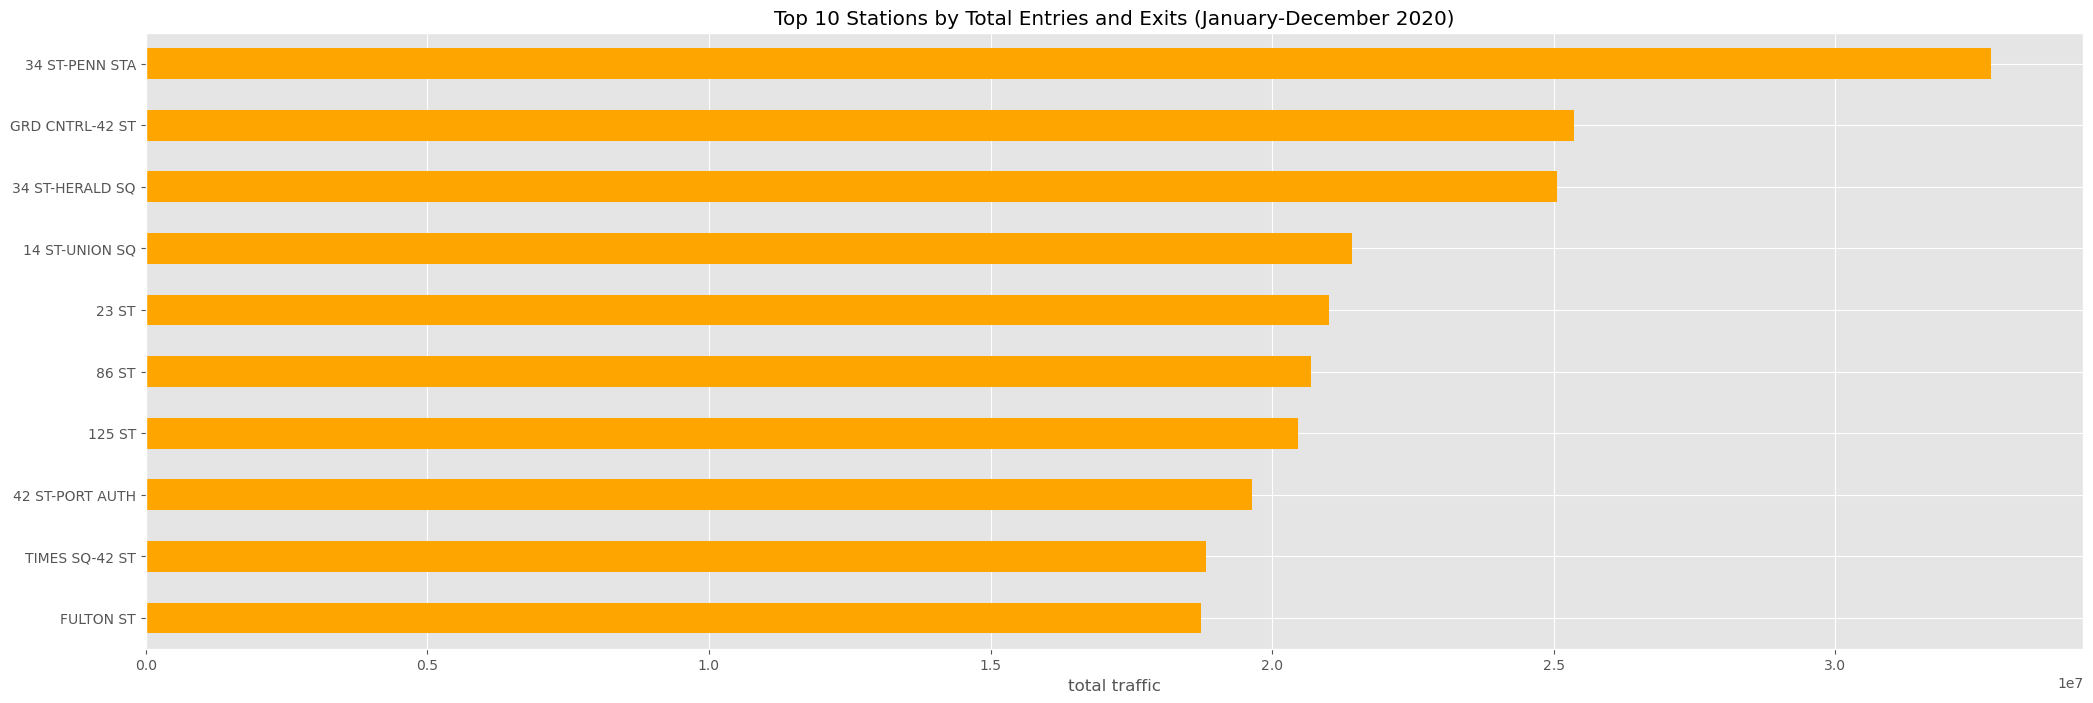

In [38]:
top_10 =mta_h1.groupby(['Station']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(25, 8))
top_10.sort_values(by = 'busy',ascending=True).plot(kind='barh', color ='orange',ax=ax)
ax.set(title='Top 10 Stations by Total Entries and Exits (January-December 2020)', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

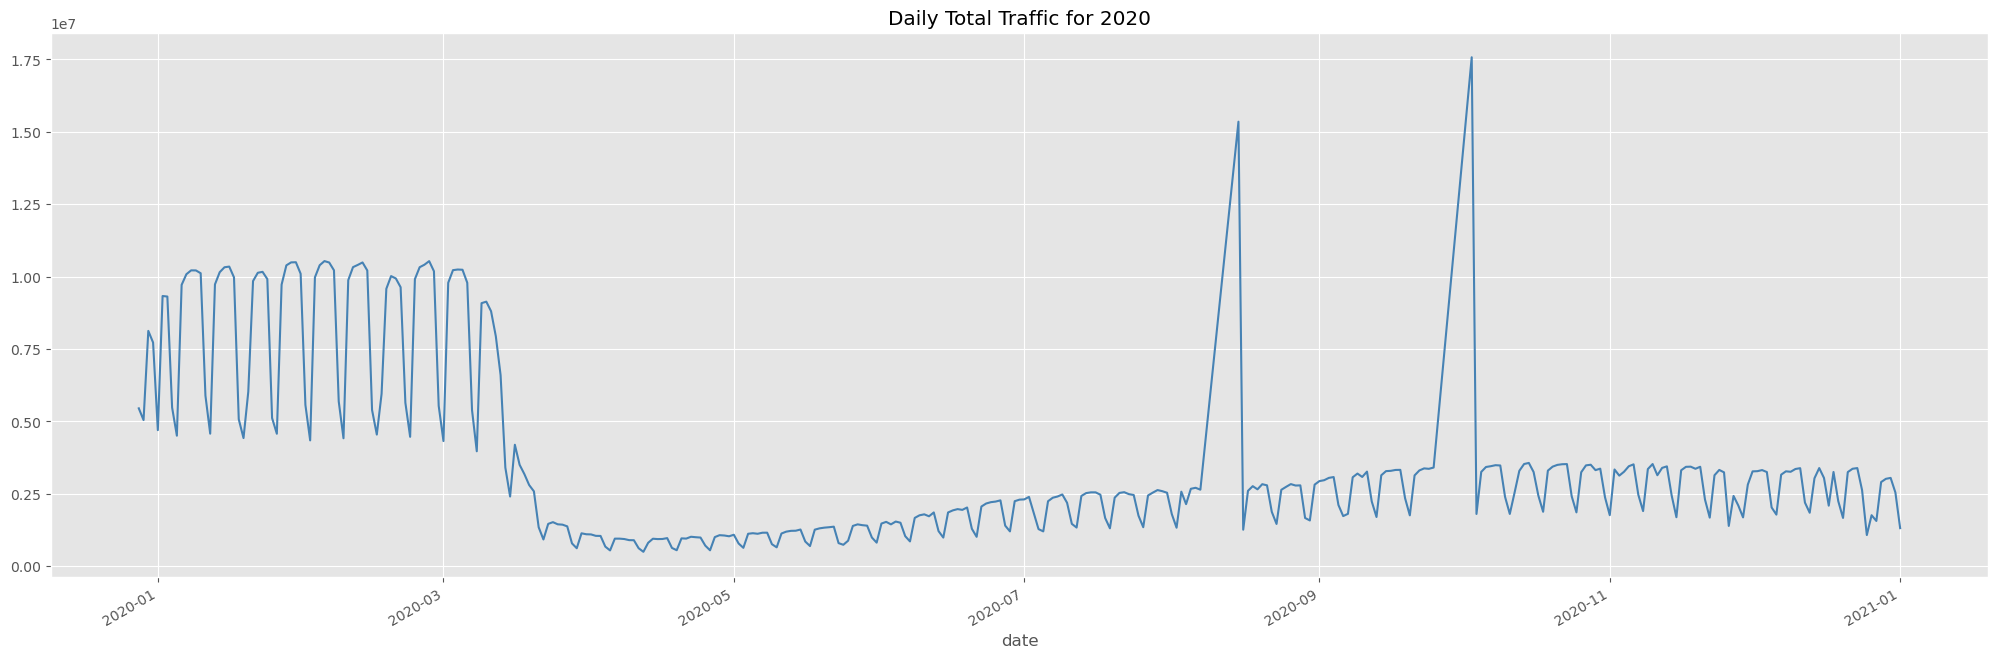

In [39]:
mta_h1busy = mta_h1[['date', 'busy']].groupby(['date']).sum().reset_index()
mta_h1busy['date'] = pd.to_datetime(mta_h1busy['date'])

fig, ax = plt.subplots(figsize=(25, 8))
mta_h1busy.set_index('date')['busy'].plot(color = 'steelblue')
plt.title('Daily Total Traffic for 2020') 
plt.show()

In [40]:
mta_timessquare = mta_timessquare = mta_h1[mta_h1['Station'] == 'TIMES SQ-42 ST'].groupby(by = 'date').agg({'busy' : sum}).reset_index()
mta_timessquare.head()
mta_timessquare['date'] = pd.to_datetime(mta_timessquare['date'])
mta_timessquare.head()

,date,busy
0,2020-01-01,113306.0
1,2021-01-01,18965.0
2,2020-01-02,188425.0
3,2020-01-03,177242.0
4,2020-01-04,114475.0


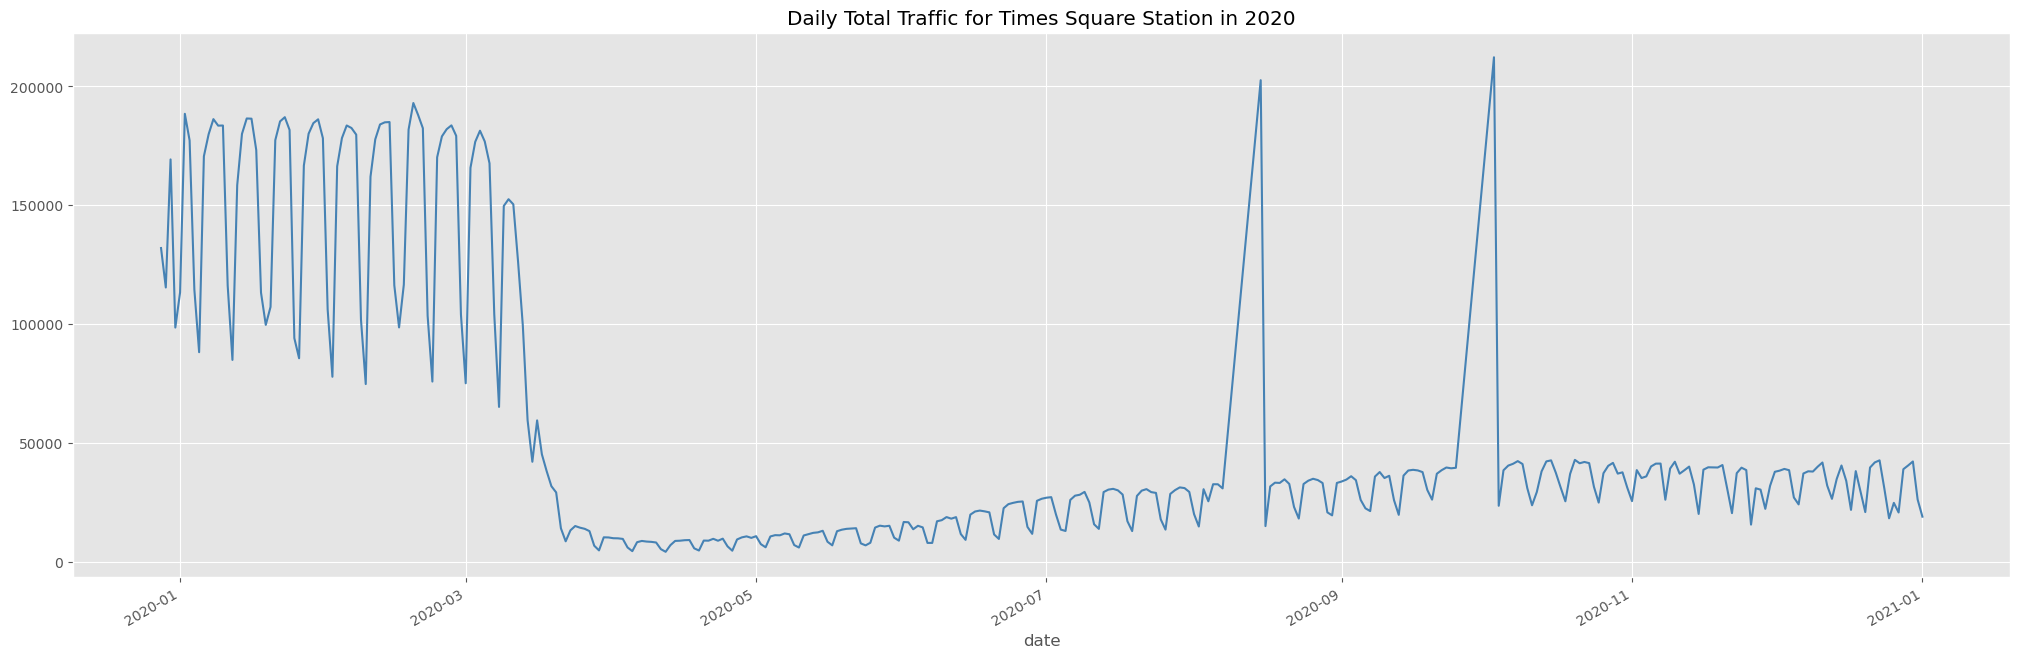

In [41]:
fig, ax = plt.subplots(figsize=(25, 8))
mta_timessquare.set_index('date')['busy'].plot(color = 'steelblue')
plt.title('Daily Total Traffic for Times Square Station in 2020') 
plt.show()

In [42]:
mta_h1busy.to_excel(r'C:\Users\will0\NYU ARISE 2023\0720 final mta AGG.xlsx')
mta_timessquare.to_excel(r'C:\Users\will0\NYU ARISE 2023\0720 final mta times square.xlsx')

In [43]:
mta_agg = mta.groupby('Station',as_index=False).agg({'entries':'sum'})
mta_agg.head()

,Station,entries
0,1 AV,1016375449620
1,103 ST,363481859733
2,103 ST-CORONA,175299967629
3,104 ST,4541587054734
4,110 ST,109508318860


In [44]:
mta_agg.describe()

,entries
count,3.790000e+02
mean,1.501470e+12
std,3.002972e+12
min,3.641575e+08
25%,4.253924e+10
50%,1.702772e+11
75%,1.322813e+12
max,2.029533e+13


In [45]:
mta_agg.to_excel(r"C:\Users\will0\NYU ARISE 2023\0720 final mta AGG.xlsx")

In [46]:
mta.datetime.describe()

count                13318000
unique                 695525
top       2020-10-03 08:00:00
freq                     5076
first     2019-12-28 00:00:00
last      2021-01-01 23:58:37
Name: datetime, dtype: object

In [47]:
mta['station and date'] = mta['Station'] + '-' + mta['date']
mta.head()

,C/A,unit,SCP,Station,line name,division,date,time,desc,entries,exits,datetime,turnstile,station and date
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,03:00:00,REGULAR,7511448,2558786,2021-01-01 03:00:00,A002-R051-02-00-00,59 ST-01/01/2021
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,7511451,2558789,2021-01-01 07:00:00,A002-R051-02-00-00,59 ST-01/01/2021
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,7511461,2558813,2021-01-01 11:00:00,A002-R051-02-00-00,59 ST-01/01/2021
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,7511495,2558831,2021-01-01 15:00:00,A002-R051-02-00-00,59 ST-01/01/2021
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,7511620,2558857,2021-01-01 19:00:00,A002-R051-02-00-00,59 ST-01/01/2021


In [48]:
mta_agg2 = mta.groupby('station and date',as_index=False).agg({'entries':'sum'})
mta_agg2.head()

,station and date,entries
0,1 AV-01/01/2020,2738731538
1,1 AV-01/01/2021,2777518471
2,1 AV-01/02/2020,2738793612
3,1 AV-01/03/2020,2738888647
4,1 AV-01/04/2020,2738961080


In [57]:
mta_agg2.to_excel(r"C:\Users\will0\NYU ARISE 2023\mta turnstiles agg.xlsx")

In [50]:
mta_timessquare = mta[mta['Station'].str.contains('TIMES SQ-42 ST', na=False)]
mta_timessquare.head()

,C/A,unit,SCP,Station,line name,division,date,time,desc,entries,exits,datetime,turnstile,station and date
186706,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,01/01/2021,03:00:00,REGULAR,9857895,12321630,2021-01-01 03:00:00,A021-R032-01-00-00,TIMES SQ-42 ST-01/01/2021
186707,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,01/01/2021,07:00:00,REGULAR,9857905,12321649,2021-01-01 07:00:00,A021-R032-01-00-00,TIMES SQ-42 ST-01/01/2021
186708,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,01/01/2021,11:00:00,REGULAR,9857950,12321737,2021-01-01 11:00:00,A021-R032-01-00-00,TIMES SQ-42 ST-01/01/2021
186709,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,01/01/2021,15:00:00,REGULAR,9858028,12321901,2021-01-01 15:00:00,A021-R032-01-00-00,TIMES SQ-42 ST-01/01/2021
186710,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,01/01/2021,19:00:00,REGULAR,9858108,12322108,2021-01-01 19:00:00,A021-R032-01-00-00,TIMES SQ-42 ST-01/01/2021


In [51]:
mta_agg_timessquare = mta_timessquare.groupby('station and date',as_index=False).agg({'entries':'sum'})
mta_agg_timessquare.head()

,station and date,entries
0,TIMES SQ-42 ST-01/01/2020,34044468207
1,TIMES SQ-42 ST-01/01/2021,21882501482
2,TIMES SQ-42 ST-01/02/2020,34044859271
3,TIMES SQ-42 ST-01/03/2020,34045390106
4,TIMES SQ-42 ST-01/04/2020,34045817533


In [52]:
mta_agg_timessquare.to_excel(r"C:\Users\will0\NYU ARISE 2023\0720 final mta times square.xlsx")

In [71]:
mta_agg_timessquare2 = mta_agg_timessquare.drop(221)
mta_agg_timessquare2 = mta_agg_timessquare2.drop(262)
mta_agg_timessquare2

,station and date,entries
0,TIMES SQ-42 ST-01/01/2020,34044468207
1,TIMES SQ-42 ST-01/01/2021,21882501482
2,TIMES SQ-42 ST-01/02/2020,34044859271
3,TIMES SQ-42 ST-01/03/2020,34045390106
4,TIMES SQ-42 ST-01/04/2020,34045817533
...,...,...
352,TIMES SQ-42 ST-12/29/2020,21882255108
353,TIMES SQ-42 ST-12/30/2019,34043879135
354,TIMES SQ-42 ST-12/30/2020,21882364326
355,TIMES SQ-42 ST-12/31/2019,34044272331


In [54]:
mta_h1busy.to_excel(r"C:\Users\will0\NYU ARISE 2023\0720 final mta AGG.xlsx")

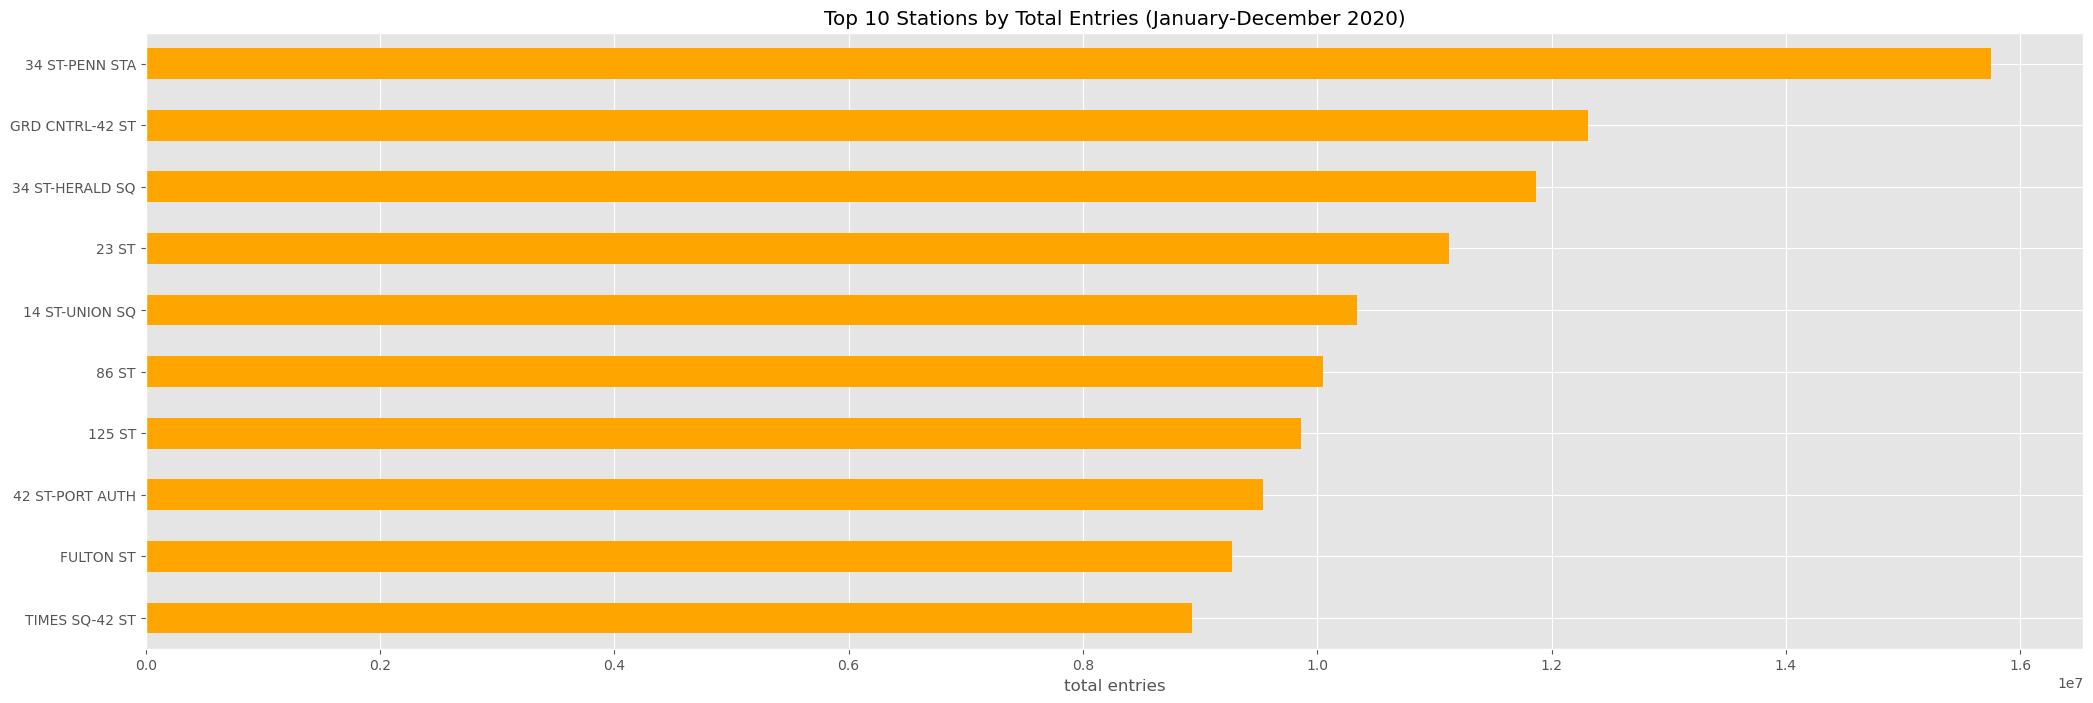

In [55]:
mta_sorted = mta.sort_values(['turnstile', 'datetime'])
mta_sorted = mta_sorted.reset_index(drop = True)

turnstile_grouped = mta_sorted.groupby(['turnstile'])

mta_sorted['entries_diff'] = turnstile_grouped['entries'].transform(pd.Series.diff)
mta_sorted['exits_diff'] = turnstile_grouped['exits'].transform(pd.Series.diff)

mta_sorted.head()

mta_sorted['entries_diff'] = mta_sorted['entries_diff'].fillna(0)
mta_sorted['exits_diff'] = mta_sorted['exits_diff'].fillna(0)

mta_sorted['entries_diff'][mta_sorted['entries_diff'] < 0] = 0 
mta_sorted['exits_diff'][mta_sorted['exits_diff'] < 0] = 0 

mta_sorted['entries_diff'][mta_sorted['entries_diff'] >= 6000] = 0 
mta_sorted['exits_diff'][mta_sorted['exits_diff'] >= 6000] = 0

mta_g1 = mta_sorted[['turnstile','Station', 'datetime','date','time', 'entries_diff','exits_diff']]

top_10_entries = mta_g1.groupby(['Station']).agg({'entries_diff': sum}).sort_values(by = 'entries_diff', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(25, 8))
top_10_entries.sort_values(by = 'entries_diff',ascending=True).plot(kind='barh', color ='orange',ax=ax)
ax.set(title='Top 10 Stations by Total Entries (January-December 2020)', xlabel='total entries', ylabel='')
ax.legend().set_visible(False)

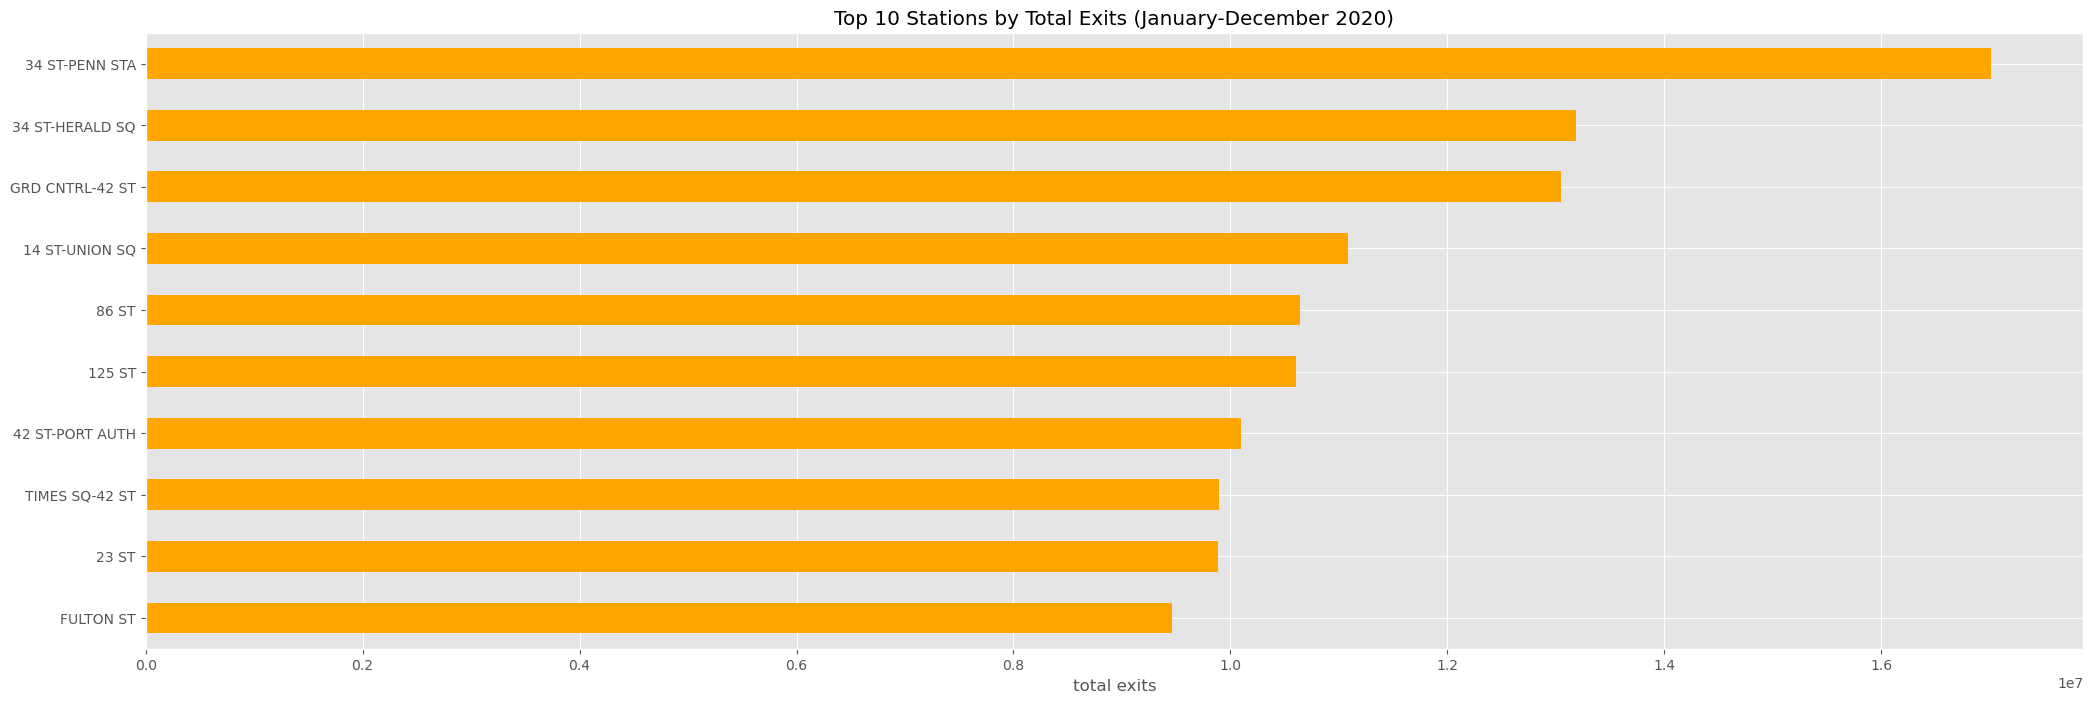

In [56]:
top_10_exits = mta_g1.groupby(['Station']).agg({'exits_diff': sum}).sort_values(by = 'exits_diff', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(25, 8))
top_10_exits.sort_values(by = 'exits_diff',ascending=True).plot(kind='barh', color ='orange',ax=ax)
ax.set(title='Top 10 Stations by Total Exits (January-December 2020)', xlabel='total exits', ylabel='')
ax.legend().set_visible(False)

# did i agg stations with the same name? (ex: there are multiple 23rd st stations)

In [ ]:
mta_2019 = pd.read_csv(r"C:\Users\will0\NYU ARISE 2023\Turnstile_Usage_Data__2019.csv", sep = ',',header = None,)
mta.columns =['C/A','unit','SCP','Station','line name','division','date','time','desc','entries','exits'] 
mta = mta.drop(0))

mta_2019['datetime'] = pd.to_datetime(mta_2019.date + ' ' + mta.time, format='%m/%d/%Y  %H:%M:%S')
mta_2019['turnstile'] = mta_2019['C/A'] + '-' + mta_2019['unit'] + '-' + mta_2019['SCP']

mta_2019['entries'] = mta_2019['entries'].astype('str')
mta_2019['entries'] = mta_2019['entries'].str.replace(',','')
mta_2019['exits'] = mta_2019['exits'].astype('str')
mta_2019['exits'] = mta_2019['exits'].str.replace(',','')
mta_2019['entries'] = mta_2019['entries'].astype('int')
mta_2019['exits'] = mta_2019['exits'].astype('int')

mta_sorted = mta.sort_values(['turnstile', 'datetime'])
mta_sorted = mta_sorted.reset_index(drop = True)

turnstile_grouped = mta_sorted.groupby(['turnstile'])

mta_sorted['entries_diff'] = turnstile_grouped['entries'].transform(pd.Series.diff)
mta_sorted['exits_diff'] = turnstile_grouped['exits'].transform(pd.Series.diff)

mta_sorted.head()
